# Model Comparison Results

This notebook analyzes and visualizes the results of our software defect prediction models (SVM-RBF, Balanced Random Forest, and XGBoost).

In [13]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set visualization parameters
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

## 1. Load Model Comparison Results
Load the results from our model comparison experiments.

In [14]:
# Load results from JSON file
results_path = os.path.join('..', 'reports', 'model_comparison', 'results.json')

with open(results_path, 'r') as f:
    results = json.load(f)

# Create DataFrame with metrics and other important values
processed_results = {}
for model_name, model_results in results.items():
    metrics = model_results['metrics']
    processed_results[model_name] = {
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F-beta Score': metrics['f_beta'],
        'PR-AUC': metrics['pr_auc'],
        'Optimal Threshold': model_results['threshold'],
        'Best Validation Score': model_results['best_val_score']
    }

results_df = pd.DataFrame.from_dict(processed_results, orient='index')

# Display results
print("Model Comparison Results:")
display(results_df.round(3))

Model Comparison Results:


,Precision,Recall,F-beta Score,PR-AUC,Optimal Threshold,Best Validation Score
SVM-RBF,0.298,0.537,0.463,0.350,0.273,0.407
BRF,0.326,0.468,0.431,0.358,0.193,0.425
XGBoost,0.325,0.417,0.395,0.350,0.360,0.415


## 2. Visualize Model Performance
Create bar plots to compare model performance across different metrics.

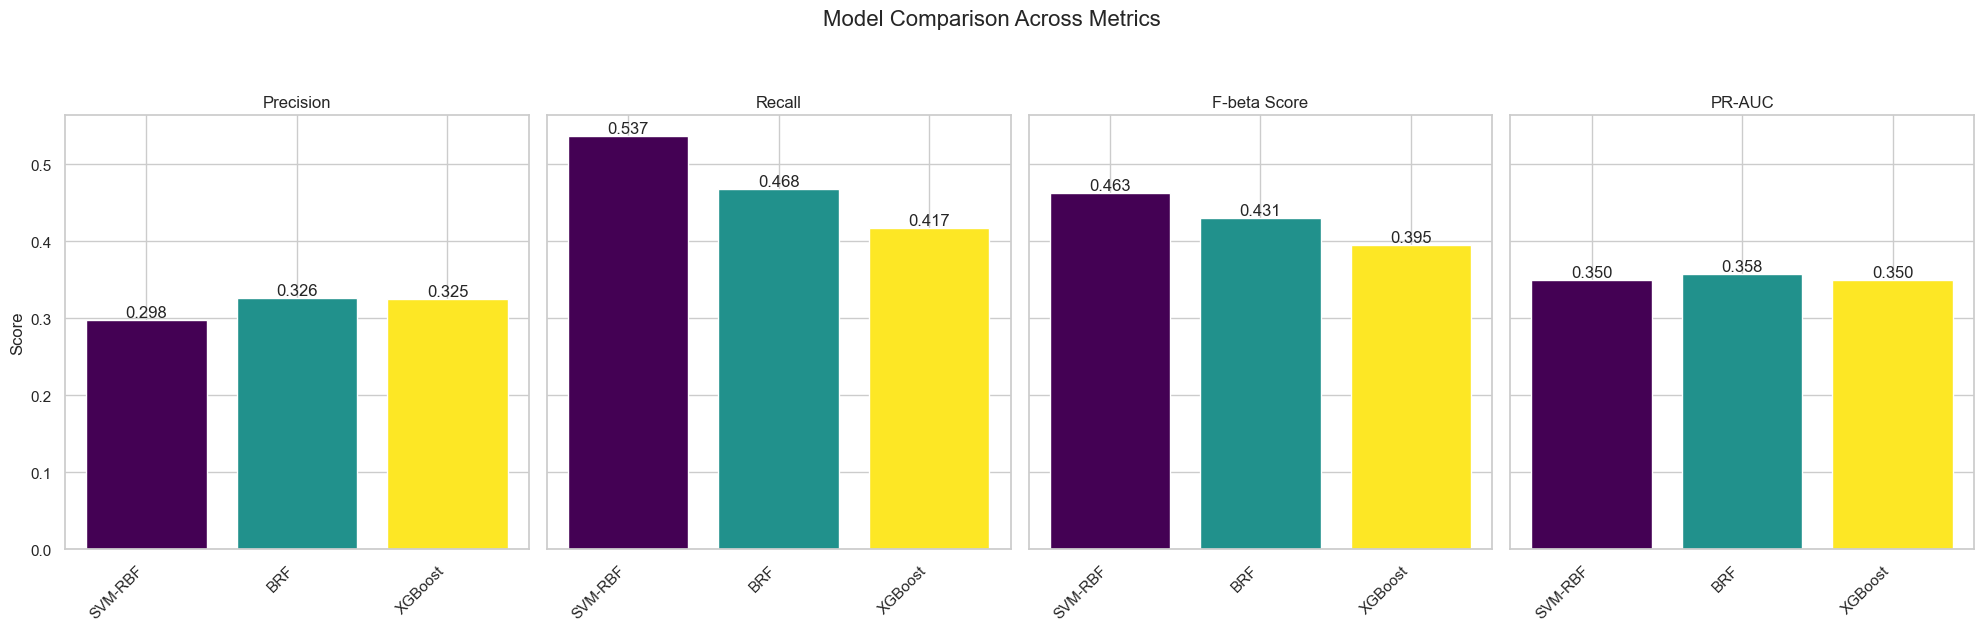

In [15]:
def plot_model_comparison(results_df):
    metrics = ["Precision", "Recall", "F-beta Score", "PR-AUC"]
    model_names = results_df.index
    n_models = len(model_names)
    n_metrics = len(metrics)
    
    # Create subplots
    fig, axes = plt.subplots(1, n_metrics, figsize=(20, 6), sharey=True)
    fig.suptitle("Model Comparison Across Metrics", fontsize=16, y=1.05)
    
    # Color palette
    colors = plt.cm.viridis(np.linspace(0, 1, n_models))
    
    # Plot each metric
    for i, metric in enumerate(metrics):
        values = results_df[metric]
        bars = axes[i].bar(range(n_models), values, color=colors)
        
        # Customize subplot
        axes[i].set_title(metric)
        axes[i].set_xticks(range(n_models))
        axes[i].set_xticklabels(model_names, rotation=45, ha='right')
        if i == 0:
            axes[i].set_ylabel('Score')
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.3f}',
                        ha='center', va='bottom')
    
    plt.tight_layout()
    return fig

# Create visualization
fig = plot_model_comparison(results_df)
plt.show()

## 3. Model Ranking Analysis
Rank models based on their performance across all metrics.

In [16]:
# Calculate overall ranking based on mean performance across metrics
metrics = ["Precision", "Recall", "F-beta Score", "PR-AUC"]
rankings = results_df[metrics].rank(ascending=False)
mean_ranks = rankings.mean(axis=1).sort_values()

print("Model Rankings (lower is better):")
display(mean_ranks)

# Best performing model
best_model = mean_ranks.index[0]
print(f"\nBest Overall Model: {best_model}")
print("\nPerformance Metrics:")
display(results_df.loc[best_model].round(3))

Model Rankings (lower is better):


BRF        1.50
SVM-RBF    1.75
XGBoost    2.75
dtype: float64


Best Overall Model: BRF

Performance Metrics:


Precision                0.326
Recall                   0.468
F-beta Score             0.431
PR-AUC                   0.358
Optimal Threshold        0.193
Best Validation Score    0.425
Name: BRF, dtype: float64

## 4. Performance Trade-offs
Analyze the trade-offs between precision and recall for each model.

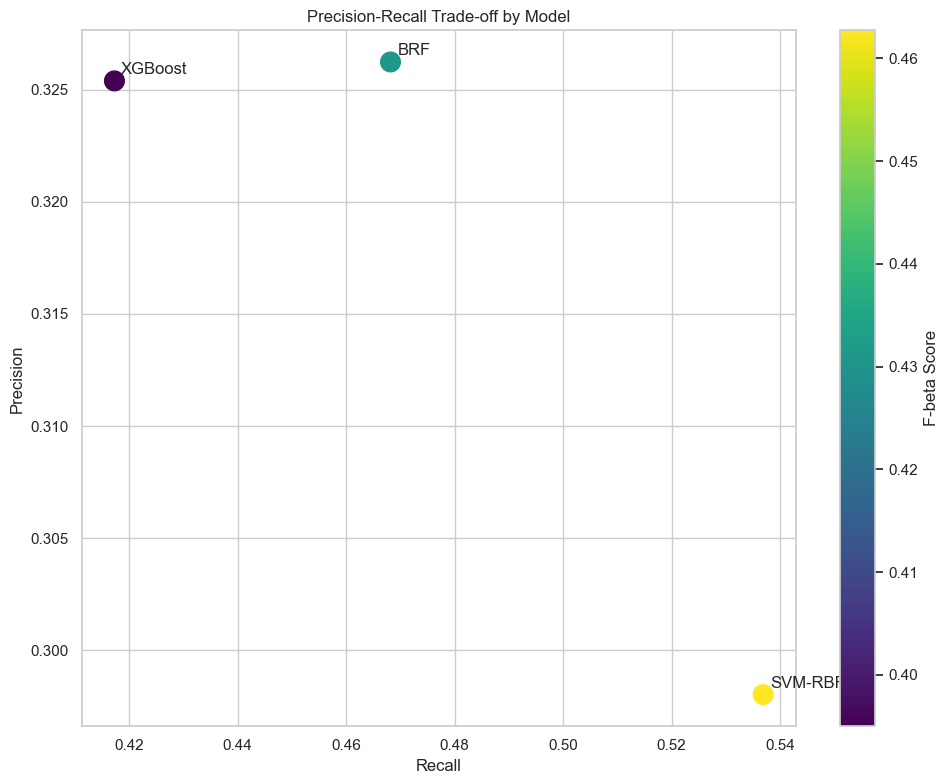

In [17]:
# Create scatter plot of precision vs recall
plt.figure(figsize=(10, 8))
scatter = plt.scatter(results_df['Recall'], results_df['Precision'], 
                     c=results_df['F-beta Score'], cmap='viridis', 
                     s=200)

# Add labels for each point
for idx in results_df.index:
    plt.annotate(idx, (results_df.loc[idx, 'Recall'], results_df.loc[idx, 'Precision']),
                xytext=(5, 5), textcoords='offset points')

plt.colorbar(scatter, label='F-beta Score')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Trade-off by Model')
plt.grid(True)
plt.tight_layout()
plt.show()